In [25]:
import pandas as pd

In [32]:
# 一开始读取数据的时候就处理
data = pd.read_csv("./assert/air_quality_no2_long.csv", parse_dates=["date.utc"])
    .rename(columns={"date.utc": "datetime"})
data

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   datetime   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB


In [34]:
data_new = pd.read_csv("./assert/air_quality_no2_long.csv")
data_new["date.utc"]

0       2019-06-21 00:00:00+00:00
1       2019-06-20 23:00:00+00:00
2       2019-06-20 22:00:00+00:00
3       2019-06-20 21:00:00+00:00
4       2019-06-20 20:00:00+00:00
                  ...            
2063    2019-05-07 06:00:00+00:00
2064    2019-05-07 04:00:00+00:00
2065    2019-05-07 03:00:00+00:00
2066    2019-05-07 02:00:00+00:00
2067    2019-05-07 01:00:00+00:00
Name: date.utc, Length: 2068, dtype: object

In [35]:
pd.to_datetime(data_new["date.utc"])

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: date.utc, Length: 2068, dtype: datetime64[ns, UTC]

In [36]:
#转换成datetime的好处可以进行日期的计算
data.datetime.max() - data.datetime.min()

Timedelta('44 days 23:00:00')

In [37]:
# 往一个新的表中添加新的字段，字段来源于datetime需要抽离成月份
data["月份"] = data.datetime.dt.month
data

,city,country,datetime,location,parameter,value,unit,月份
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6
...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,5
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,5
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,5
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,5


In [46]:
#具体需求：每个测量位置一周中每天的平均浓度是多少？
data["周"] = data.datetime.dt.weekday
data.groupby(["location", "周"])["value"].mean()

location            周
BETR801             0    27.875000
                    1    22.214286
                    2    21.125000
                    3    27.500000
                    4    28.400000
                    5    33.500000
                    6    21.896552
FR04014             0    24.856250
                    1    30.999359
                    2    29.165753
                    3    28.600690
                    4    31.617986
                    5    25.266154
                    6    23.274306
London Westminster  0    23.969697
                    1    24.885714
                    2    23.460432
                    3    24.780142
                    4    26.446809
                    5    24.977612
                    6    24.859155
Name: value, dtype: float64

In [53]:
#使用matplotlib绘制图表
import matplotlib.pyplot as plt

<Axes: xlabel='datetime'>

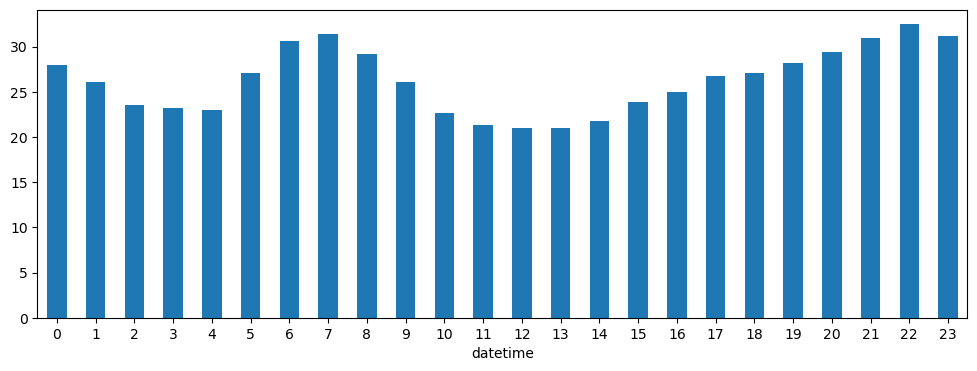

In [55]:
# 指定图表大小的
fig, axs = plt.subplots(figsize=(12, 4))
#每小时no2浓度
data.groupby([data.datetime.dt.hour])["value"].mean().plot(kind='bar', rot=0, ax=axs)

In [64]:
#当datetime类型作用index的时候不通过dt访问直接访问
data_pivot = data.pivot(index="datetime", columns=["location"], values="value")
data_pivot

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,21.4,NaN
2019-06-20 21:00:00+00:00,NaN,24.9,NaN
2019-06-20 22:00:00+00:00,NaN,26.5,NaN


In [67]:
data_pivot.index.hour

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
       15, 16, 17, 18, 19, 20, 21, 22, 23,  0],
      dtype='int32', name='datetime', length=1033)

In [68]:
data

,city,country,datetime,location,parameter,value,unit,月份,周
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,4
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6,3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6,3
...,...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,5,1
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,5,1
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,5,1
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,5,1


<Axes: xlabel='datetime'>

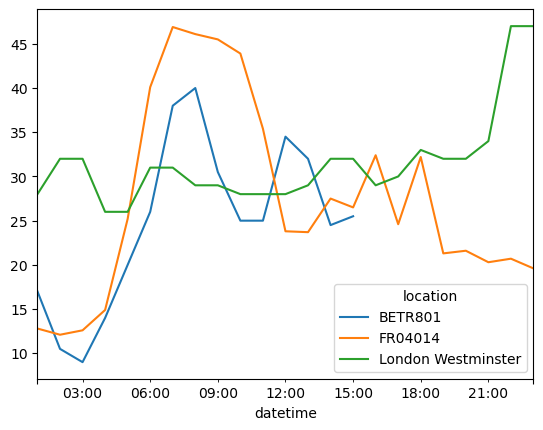

In [74]:
#从5月20日至5月21日结束，绘制不同站点的NO2值图：
data[(data["datetime"] > "2019-05-20") & (data["datetime"] < "2019-05-21")].pivot(index="datetime",columns="location",values="value").plot()

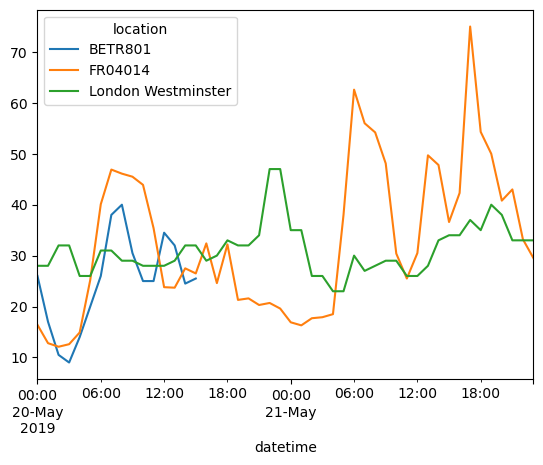

In [77]:
# 一样的效果
data_pivot["2019-05-20":"2019-05-21"].plot();

In [78]:
data_pivot["2019-05-20":"2019-05-21"]

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-20 00:00:00+00:00,26.0,16.4,28.0
2019-05-20 01:00:00+00:00,17.0,12.8,28.0
2019-05-20 02:00:00+00:00,10.5,12.1,32.0
2019-05-20 03:00:00+00:00,9.0,12.6,32.0
2019-05-20 04:00:00+00:00,14.0,14.9,26.0
2019-05-20 05:00:00+00:00,20.0,25.2,26.0
2019-05-20 06:00:00+00:00,26.0,40.1,31.0
2019-05-20 07:00:00+00:00,38.0,46.9,31.0
2019-05-20 08:00:00+00:00,40.0,46.1,29.0


In [84]:
#统计固定时间间隔的数据，下面列子中每隔3小时候计算一下这三个消息之内采集到的数据的最大值
resample_data = data_pivot["2019-05-20":"2019-05-21"].resample("3h").max()
resample_data

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-20 00:00:00+00:00,26.0,16.4,32.0
2019-05-20 03:00:00+00:00,20.0,25.2,32.0
2019-05-20 06:00:00+00:00,40.0,46.9,31.0
2019-05-20 09:00:00+00:00,30.5,45.5,29.0
2019-05-20 12:00:00+00:00,34.5,27.5,32.0
2019-05-20 15:00:00+00:00,25.5,32.4,32.0
2019-05-20 18:00:00+00:00,NaN,32.2,33.0
2019-05-20 21:00:00+00:00,NaN,20.7,47.0
2019-05-21 00:00:00+00:00,15.5,17.7,35.0
